In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
data = pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx")
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
data = data.fillna(method="ffill")

In [14]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [15]:
data["Airline"] = np.where(data["Airline"] == "Vistara Premium economy", "Vistara", data["Airline"])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

In [16]:
data1 = pd.get_dummies(data=data, columns = ['Airline', 'Source', 'Destination'])

data1.head()

Date_of_Journey                  Route Dep_Time  Arrival_Time Duration  \
0      24/03/2019              BLR → DEL    22:20  01:10 22 Mar   2h 50m   
1       1/05/2019  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m   
2       9/06/2019  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h   
3      12/05/2019        CCU → NAG → BLR    18:05         23:30   5h 25m   
4      01/03/2019        BLR → NAG → DEL    16:50         21:35   4h 45m   

  Total_Stops Additional_Info  Price  Airline_Air Asia  Airline_Air India  \
0    non-stop         No info   3897                 0                  0   
1     2 stops         No info   7662                 0                  1   
2     2 stops         No info  13882                 0                  0   
3      1 stop         No info   6218                 0                  0   
4      1 stop         No info  13302                 0                  0   

   ...  Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0  ...               0             0               0              0   
1  ...               0             0               1              0   
2  ...               0             1               0              0   
3  ...               0             0               1              0   
4  ...               0             0               0              0   

   Destination_Banglore  Destination_Cochin  Destination_Delhi  \
0                     0                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 28 columns]

In [17]:
data.shape

(10683, 11)

In [18]:
data1.shape

(10683, 28)

In [19]:
data1["Total_Stops"].value_counts()

1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data1["Total_Stops"].head()

0    0
1    2
2    2
3    1
4    1
Name: Total_Stops, dtype: int64

In [21]:
duration = list(data1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))


data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']

In [22]:
data1.head()

Date_of_Journey                  Route Dep_Time  Arrival_Time Duration  \
0      24/03/2019              BLR → DEL    22:20  01:10 22 Mar   2h 50m   
1       1/05/2019  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m   
2       9/06/2019  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h   
3      12/05/2019        CCU → NAG → BLR    18:05         23:30   5h 25m   
4      01/03/2019        BLR → NAG → DEL    16:50         21:35   4h 45m   

   Total_Stops Additional_Info  Price  Airline_Air Asia  Airline_Air India  \
0            0         No info   3897                 0                  0   
1            2         No info   7662                 0                  1   
2            2         No info  13882                 0                  0   
3            1         No info   6218                 0                  0   
4            1         No info  13302                 0                  0   

   ...  Source_Mumbai  Destination_Banglore  Destination_Cochin  \
0  ...              0                     0                   0   
1  ...              0                     1                   0   
2  ...              0                     0                   1   
3  ...              0                     1                   0   
4  ...              0                     0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  Duration_hours  Duration_minutes  \
0                      1             120                50   
1                      0             420                25   
2                      0            1140                 0   
3                      0             300                25   
4                      1             240                45   

   Duration_Total_mins  
0                  170  
1                  445  
2                 1140  
3                  325  
4                  285  

[5 rows x 31 columns]

In [23]:
data1["Dep_Hour"] = pd.to_datetime(data1["Dep_Time"]).dt.hour
data1["Dep_Min"]= pd.to_datetime(data1['Dep_Time']).dt.minute

In [24]:
data1["Arrival_Hour"] = pd.to_datetime(data1["Arrival_Time"]).dt.hour
data1["Arrival_Min"]= pd.to_datetime(data1['Arrival_Time']).dt.minute

In [25]:
data1["dep_timezone"] = pd.cut(data1.Dep_Hour, [0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])
data1["dep_timezone"]

0          Evening
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
10678      Evening
10679      Evening
10680      Morning
10681      Morning
10682      Morning
Name: dep_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [26]:
data1["arr_timezone"] = pd.cut(data1.Arrival_Hour, [0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])
data1["arr_timezone"]

0            Night
1        Afternoon
2            Night
3          Evening
4          Evening
           ...    
10678      Evening
10679      Evening
10680      Morning
10681    Afternoon
10682      Evening
Name: arr_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

In [27]:
data1['Month']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [28]:
data1['Day']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.day
data1['Day']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [29]:
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()

In [30]:
data1.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'dep_timezone',
       'arr_timezone', 'Month', 'Day', 'day_of_week'],
      dtype='object')

In [31]:
new_data = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'dep_timezone', 'Price']]

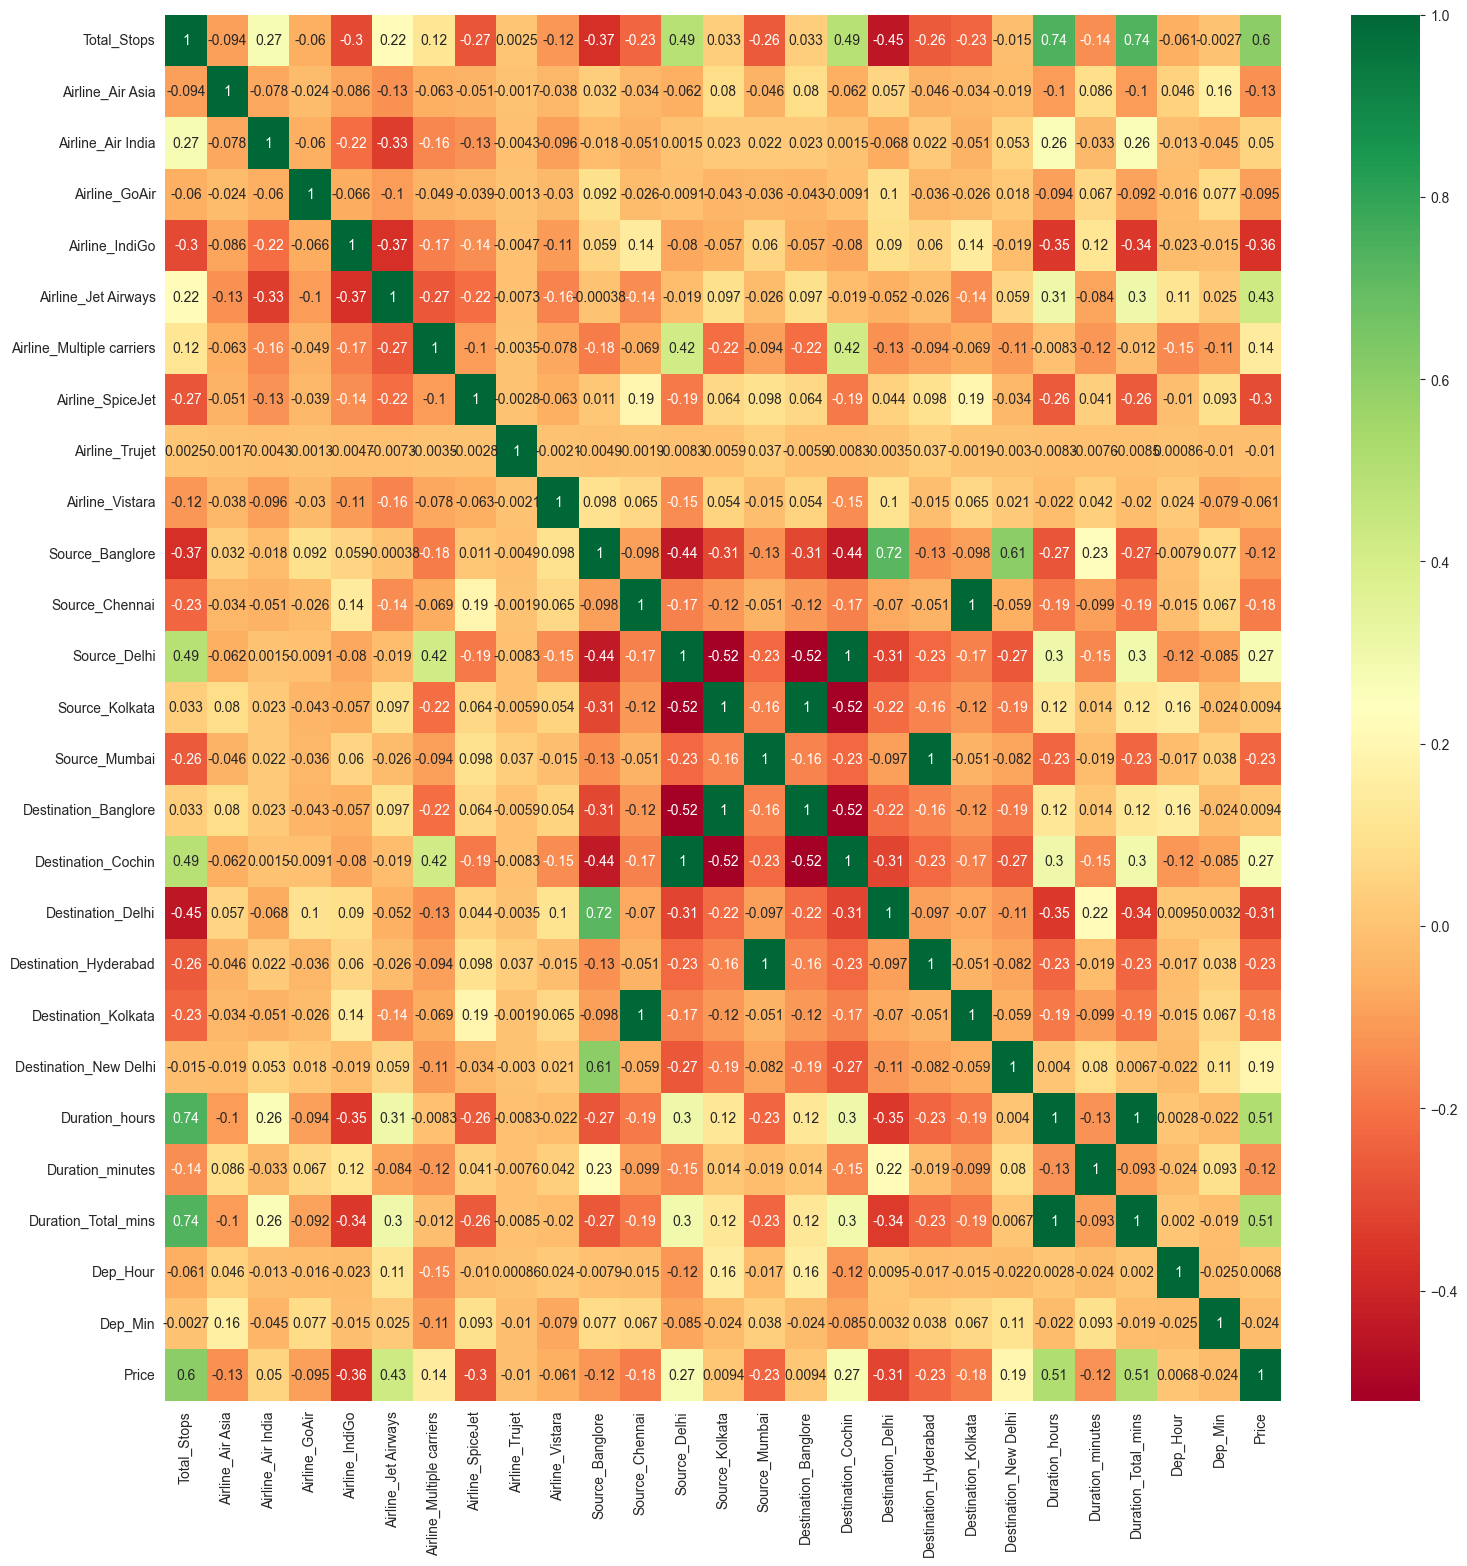

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(), annot=True, cmap="RdYlGn")

plt.show()

In [33]:
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Destination_Hyderabad       -0.230745
Source_Mumbai               -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Airline_Air Asia            -0.133044
Duration_minutes            -0.124874
Source_Banglore             -0.118026
Airline_GoAir               -0.095146
Airline_Vistara             -0.060503
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Destination_Banglore         0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Destination_Cochin           0.270619
Source_Delhi                 0.270619
Airline_Jet Airways          0.428490
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603891
Price       

<AxesSubplot: >

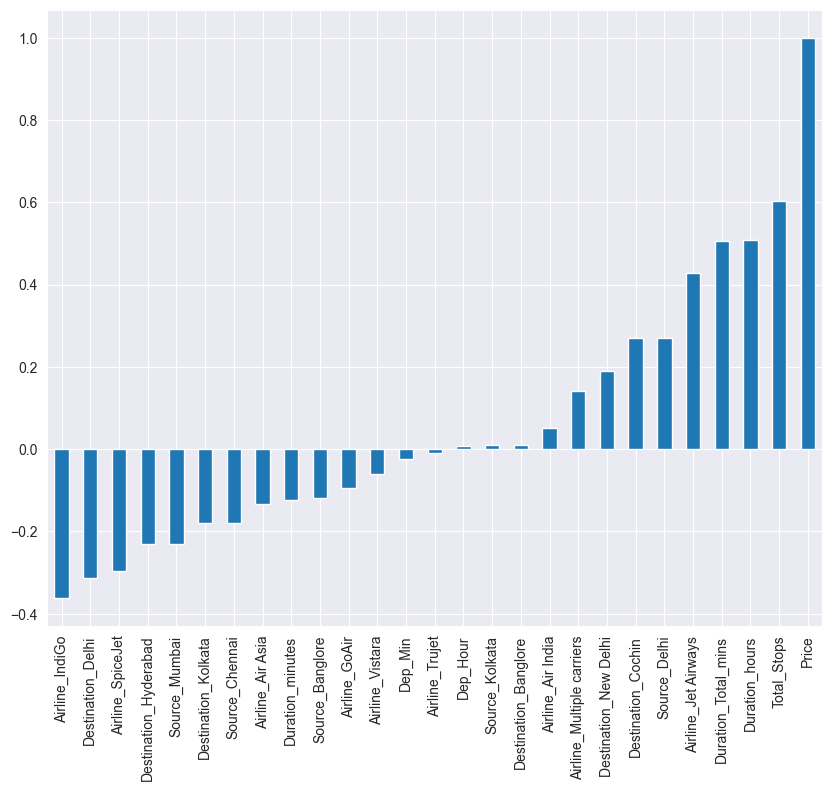

In [34]:
features.plot(kind='bar',figsize=(10,8))

In [35]:
x = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]

In [36]:
y= data1.Price

In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x.astype(np.float64))
x

array([[-1.22052384, -0.17544122, -0.44291155, ..., -0.93158255,
         1.65425948, -0.23505036],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.39007152,
        -1.30309491,  1.36349161],
       [ 1.74150619, -0.17544122, -0.44291155, ...,  0.97847452,
        -0.60724682,  0.0313733 ],
       ...,
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.91189124,
        -0.78120884, -0.23505036],
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.95127386,
        -0.25932278,  0.29779696],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.28176932,
        -0.4332848 ,  1.62991527]])

In [38]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-2.87557946, -0.55556041],
       [ 0.31882147,  2.39230567],
       [ 3.05931327, -0.52668443],
       ...,
       [-2.24753915, -0.58794495],
       [-2.69893348, -0.2894108 ],
       [ 1.92548142, -1.1041202 ]])

In [39]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.17545521, 0.12110718])

In [40]:
pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17545521, 0.12110719, 0.0926492 , 0.08280111, 0.06739565,
       0.05275645, 0.04819544])

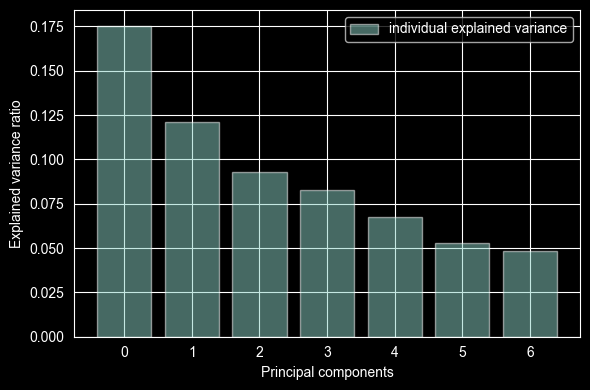

In [41]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [42]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1

d

16

In [43]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

In [44]:
px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)